# Initial Exploration and Cleaning
## Imports and config

In [67]:
import math, json, re, os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.dpi'] = 120


DATA_PATH = 'docs/csv/all_results.csv'
OUTDIR = Path("notebook_plots"); OUTDIR.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(DATA_PATH)

# quick clean just for certainty
df.columns = [c.strip() for c in df.columns]


In [68]:
df.head(10)

,model_key,threads,layers,units,batch,lr,momentum,decay,step,epochs,train_time_s,speedup,efficiency_pct,best_val_pct,test_acc_pct,model_path,log_path
0,m1_L1_U32_B64_lr0.13_m0.94_d0.965_s3_T1,1,1,32,64,0.13,0.940,0.965,3,60,11.7,0.358974,35.897436,95.4,93.93,runs/grid_20250928-190434/models/m1_L1_U32_B64...,runs/grid_20250928-190434/logs/m1_L1_U32_B64_l...
1,m2_L1_U32_B64_lr0.13_m0.94_d0.97_s3_T1,1,1,32,64,0.13,0.940,0.970,3,60,6.0,0.700000,70.000000,94.8,92.96,runs/grid_20250928-190434/models/m2_L1_U32_B64...,runs/grid_20250928-190434/logs/m2_L1_U32_B64_l...
2,m3_L1_U32_B64_lr0.13_m0.94_d0.975_s3_T1,1,1,32,64,0.13,0.940,0.975,3,60,13.3,0.315789,31.578947,95.5,93.89,runs/grid_20250928-190434/models/m3_L1_U32_B64...,runs/grid_20250928-190434/logs/m3_L1_U32_B64_l...
3,m4_L1_U32_B64_lr0.13_m0.94_d0.98_s3_T1,1,1,32,64,0.13,0.940,0.980,3,60,4.2,1.000000,100.000000,94.4,92.55,runs/grid_20250928-190434/models/m4_L1_U32_B64...,runs/grid_20250928-190434/logs/m4_L1_U32_B64_l...
4,m5_L1_U32_B64_lr0.13_m0.94_d0.985_s3_T1,1,1,32,64,0.13,0.940,0.985,3,60,4.3,0.976744,97.674419,94.4,92.38,runs/grid_20250928-190434/models/m5_L1_U32_B64...,runs/grid_20250928-190434/logs/m5_L1_U32_B64_l...
5,m6_L1_U32_B64_lr0.13_m0.945_d0.965_s3_T1,1,1,32,64,0.13,0.945,0.965,3,60,12.6,0.333333,33.333333,95.5,93.86,runs/grid_20250928-190434/models/m6_L1_U32_B64...,runs/grid_20250928-190434/logs/m6_L1_U32_B64_l...
6,m7_L1_U32_B64_lr0.13_m0.945_d0.97_s3_T1,1,1,32,64,0.13,0.945,0.970,3,60,6.0,0.700000,70.000000,94.5,92.60,runs/grid_20250928-190434/models/m7_L1_U32_B64...,runs/grid_20250928-190434/logs/m7_L1_U32_B64_l...
7,m8_L1_U32_B64_lr0.13_m0.945_d0.975_s3_T1,1,1,32,64,0.13,0.945,0.975,3,60,5.8,0.724138,72.413793,95.3,92.90,runs/grid_20250928-190434/models/m8_L1_U32_B64...,runs/grid_20250928-190434/logs/m8_L1_U32_B64_l...
8,m9_L1_U32_B64_lr0.13_m0.945_d0.98_s3_T1,1,1,32,64,0.13,0.945,0.980,3,60,5.8,0.724138,72.413793,94.9,92.60,runs/grid_20250928-190434/models/m9_L1_U32_B64...,runs/grid_20250928-190434/logs/m9_L1_U32_B64_l...
9,m10_L1_U32_B64_lr0.13_m0.945_d0.985_s3_T1,1,1,32,64,0.13,0.945,0.985,3,60,7.1,0.591549,59.154930,95.0,92.09,runs/grid_20250928-190434/models/m10_L1_U32_B6...,runs/grid_20250928-190434/logs/m10_L1_U32_B64_...


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   model_key       10000 non-null  object 
 1   threads         10000 non-null  int64  
 2   layers          10000 non-null  int64  
 3   units           10000 non-null  int64  
 4   batch           10000 non-null  int64  
 5   lr              10000 non-null  float64
 6   momentum        10000 non-null  float64
 7   decay           10000 non-null  float64
 8   step            10000 non-null  int64  
 9   epochs          10000 non-null  int64  
 10  train_time_s    10000 non-null  float64
 11  speedup         10000 non-null  float64
 12  efficiency_pct  10000 non-null  float64
 13  best_val_pct    10000 non-null  float64
 14  test_acc_pct    10000 non-null  float64
 15  model_path      10000 non-null  object 
 16  log_path        10000 non-null  object 
dtypes: float64(8), int64(6), object(

In [70]:
df.describe()

,threads,layers,units,batch,lr,momentum,decay,step,epochs,train_time_s,speedup,efficiency_pct,best_val_pct,test_acc_pct
count,10000.000000,10000.0,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,8.500000,1.0,32.0,396.80000,0.140000,0.950000,0.975000,3.0,60.0,3.000610,1.777088,27.545732,95.11352,93.146647
std,4.610003,0.0,0.0,349.15491,0.007071,0.007071,0.007071,0.0,0.0,1.904974,0.727956,15.181580,0.66259,0.711119
min,1.000000,1.0,32.0,64.00000,0.130000,0.940000,0.965000,3.0,60.0,1.100000,0.222222,2.599010,91.40000,87.810000
25%,4.750000,1.0,32.0,128.00000,0.135000,0.945000,0.970000,3.0,60.0,1.800000,1.235294,16.406250,95.00000,93.000000
50%,8.500000,1.0,32.0,256.00000,0.140000,0.950000,0.975000,3.0,60.0,2.400000,1.750000,23.863636,95.30000,93.350000
75%,12.250000,1.0,32.0,512.00000,0.145000,0.955000,0.980000,3.0,60.0,3.400000,2.333333,35.897436,95.50000,93.510000
max,16.000000,1.0,32.0,1024.00000,0.150000,0.960000,0.985000,3.0,60.0,18.900000,3.818182,100.000000,96.20000,94.480000


## Cleaning

In [71]:
# Clean numeric columns, coerce errors to NaN
for col in ["train_time_s", "best_val_pct", "test_acc_pct", "threads", "layers", "batch", "lr", "momentum", "decay", "step", "epochs"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        
# Filter obviously bad rows (no time, no accuracy, etc.)
before = len(df)
df = df.dropna(subset=["train_time_s", "best_val_pct"], how="any")
print(f"[clean] dropped {before - len(df)} rows with missing core fields")

# Reasonable Bounds
df = df[(df['train_time_s'] > 0) & (df['best_val_pct'].between(80, 100))]

df.sample(5)

[clean] dropped 0 rows with missing core fields


,model_key,threads,layers,units,batch,lr,momentum,decay,step,epochs,train_time_s,speedup,efficiency_pct,best_val_pct,test_acc_pct,model_path,log_path
2829,m2830_L1_U32_B256_lr0.145_m0.94_d0.985_s3_T5,5,1,32,256,0.145,0.940,0.985,3,60,1.9,2.210526,44.210526,95.7,93.46,runs/grid_20250928-190434/models/m2830_L1_U32_...,runs/grid_20250928-190434/logs/m2830_L1_U32_B2...
1411,m1412_L1_U32_B128_lr0.135_m0.95_d0.97_s3_T3,3,1,32,128,0.135,0.950,0.970,3,60,3.7,1.135135,37.837838,96.1,93.90,runs/grid_20250928-190434/models/m1412_L1_U32_...,runs/grid_20250928-190434/logs/m1412_L1_U32_B1...
7069,m7070_L1_U32_B128_lr0.14_m0.955_d0.985_s3_T12,12,1,32,128,0.140,0.955,0.985,3,60,1.9,2.210526,18.421053,94.9,93.19,runs/grid_20250928-190434/models/m7070_L1_U32_...,runs/grid_20250928-190434/logs/m7070_L1_U32_B1...
5980,m5981_L1_U32_B256_lr0.15_m0.945_d0.965_s3_T10,10,1,32,256,0.150,0.945,0.965,3,60,1.6,2.625000,26.250000,95.6,93.12,runs/grid_20250928-190434/models/m5981_L1_U32_...,runs/grid_20250928-190434/logs/m5981_L1_U32_B2...
7940,m7941_L1_U32_B512_lr0.14_m0.955_d0.965_s3_T13,13,1,32,512,0.140,0.955,0.965,3,60,1.4,3.000000,23.076923,95.6,93.08,runs/grid_20250928-190434/models/m7941_L1_U32_...,runs/grid_20250928-190434/logs/m7941_L1_U32_B5...


# Leaderboard slices

In [72]:
# top-K by speed and accuracy ---
K = 10

top_speed = df.sort_values("train_time_s", ascending=True).head(K)[
    ["model_key","train_time_s","speedup","efficiency_pct","best_val_pct","test_acc_pct","layers","units","batch","threads","lr","momentum","decay","step","epochs"]
]
top_acc_val = df.sort_values("best_val_pct", ascending=False).head(K)[
    ["model_key","best_val_pct","test_acc_pct","train_time_s","speedup","threads","layers","units","batch","lr","momentum","decay","step","epochs"]
]
top_acc_test = df.dropna(subset=["test_acc_pct"]).sort_values("test_acc_pct", ascending=False).head(K)[
    ["model_key","test_acc_pct","best_val_pct","train_time_s","speedup","threads","layers","units","batch","lr","momentum","decay","step","epochs"]
] if "test_acc_pct" in df.columns else pd.DataFrame()


## Top Speed

In [73]:
display(top_speed)

,model_key,train_time_s,speedup,efficiency_pct,best_val_pct,test_acc_pct,layers,units,batch,threads,lr,momentum,decay,step,epochs
9183,m9184_L1_U32_B512_lr0.14_m0.945_d0.98_s3_T15,1.1,3.818182,25.454545,95.1,92.54,1,32,512,15,0.140,0.945,0.980,3,60
7788,m7789_L1_U32_B256_lr0.135_m0.95_d0.98_s3_T13,1.1,3.818182,29.370629,95.1,92.43,1,32,256,13,0.135,0.950,0.980,3,60
6538,m6539_L1_U32_B256_lr0.135_m0.95_d0.98_s3_T11,1.1,3.818182,34.710744,95.1,92.43,1,32,256,11,0.135,0.950,0.980,3,60
8558,m8559_L1_U32_B512_lr0.14_m0.945_d0.98_s3_T14,1.1,3.818182,27.272727,95.1,92.54,1,32,512,14,0.140,0.945,0.980,3,60
7933,m7934_L1_U32_B512_lr0.14_m0.945_d0.98_s3_T13,1.1,3.818182,29.370629,95.1,92.54,1,32,512,13,0.140,0.945,0.980,3,60
9257,m9258_L1_U32_B1024_lr0.13_m0.945_d0.975_s3_T15,1.2,3.500000,23.333333,94.5,92.12,1,32,1024,15,0.130,0.945,0.975,3,60
9927,m9928_L1_U32_B1024_lr0.14_m0.94_d0.975_s3_T16,1.2,3.500000,21.875000,94.4,92.52,1,32,1024,16,0.140,0.940,0.975,3,60
9930,m9931_L1_U32_B1024_lr0.14_m0.945_d0.965_s3_T16,1.2,3.500000,21.875000,94.4,92.00,1,32,1024,16,0.140,0.945,0.965,3,60
9258,m9259_L1_U32_B1024_lr0.13_m0.945_d0.98_s3_T15,1.2,3.500000,23.333333,94.7,92.16,1,32,1024,15,0.130,0.945,0.980,3,60
5913,m5914_L1_U32_B256_lr0.135_m0.95_d0.98_s3_T10,1.2,3.500000,35.000000,95.1,92.43,1,32,256,10,0.135,0.950,0.980,3,60


## Top Validation Accuracy

In [74]:
display(top_acc_val)

,model_key,best_val_pct,test_acc_pct,train_time_s,speedup,threads,layers,units,batch,lr,momentum,decay,step,epochs
1251,m1252_L1_U32_B64_lr0.13_m0.94_d0.97_s3_T3,96.2,94.12,7.5,0.560000,3,1,32,64,0.13,0.94,0.970,3,60
1477,m1478_L1_U32_B128_lr0.15_m0.94_d0.975_s3_T3,96.2,93.70,3.3,1.272727,3,1,32,128,0.15,0.94,0.975,3,60
6477,m6478_L1_U32_B128_lr0.15_m0.94_d0.975_s3_T11,96.2,93.70,2.2,1.909091,11,1,32,128,0.15,0.94,0.975,3,60
7727,m7728_L1_U32_B128_lr0.15_m0.94_d0.975_s3_T13,96.2,93.70,2.3,1.826087,13,1,32,128,0.15,0.94,0.975,3,60
9602,m9603_L1_U32_B128_lr0.15_m0.94_d0.975_s3_T16,96.2,93.70,2.8,1.500000,16,1,32,128,0.15,0.94,0.975,3,60
8352,m8353_L1_U32_B128_lr0.15_m0.94_d0.975_s3_T14,96.2,93.70,2.4,1.750000,14,1,32,128,0.15,0.94,0.975,3,60
7636,m7637_L1_U32_B128_lr0.13_m0.95_d0.97_s3_T13,96.2,94.14,4.2,1.000000,13,1,32,128,0.13,0.95,0.970,3,60
5852,m5853_L1_U32_B128_lr0.15_m0.94_d0.975_s3_T10,96.2,93.70,2.3,1.826087,10,1,32,128,0.15,0.94,0.975,3,60
5227,m5228_L1_U32_B128_lr0.15_m0.94_d0.975_s3_T9,96.2,93.70,2.2,1.909091,9,1,32,128,0.15,0.94,0.975,3,60
852,m853_L1_U32_B128_lr0.15_m0.94_d0.975_s3_T2,96.2,93.70,4.3,0.976744,2,1,32,128,0.15,0.94,0.975,3,60


## Top Test Accuracy

In [75]:
if len(top_acc_test):
    display(top_acc_test)

,model_key,test_acc_pct,best_val_pct,train_time_s,speedup,threads,layers,units,batch,lr,momentum,decay,step,epochs
6876,m6877_L1_U32_B64_lr0.13_m0.94_d0.97_s3_T12,94.48,95.7,6.0,0.700000,12,1,32,64,0.13,0.940,0.970,3,60
6925,m6926_L1_U32_B64_lr0.14_m0.94_d0.965_s3_T12,94.43,95.3,6.8,0.617647,12,1,32,64,0.14,0.940,0.965,3,60
7023,m7024_L1_U32_B128_lr0.13_m0.96_d0.98_s3_T12,94.38,95.6,3.9,1.076923,12,1,32,128,0.13,0.960,0.980,3,60
732,m733_L1_U32_B64_lr0.15_m0.945_d0.975_s3_T2,94.32,95.5,10.7,0.392523,2,1,32,64,0.15,0.945,0.975,3,60
8898,m8899_L1_U32_B128_lr0.13_m0.96_d0.98_s3_T15,94.29,95.7,3.4,1.235294,15,1,32,128,0.13,0.960,0.980,3,60
8261,m8262_L1_U32_B128_lr0.13_m0.95_d0.97_s3_T14,94.29,96.2,3.7,1.135135,14,1,32,128,0.13,0.950,0.970,3,60
2648,m2649_L1_U32_B128_lr0.13_m0.96_d0.98_s3_T5,94.28,95.9,3.6,1.166667,5,1,32,128,0.13,0.960,0.980,3,60
1398,m1399_L1_U32_B128_lr0.13_m0.96_d0.98_s3_T3,94.28,95.9,4.7,0.893617,3,1,32,128,0.13,0.960,0.980,3,60
6305,m6306_L1_U32_B64_lr0.14_m0.945_d0.965_s3_T11,94.28,95.1,5.3,0.792453,11,1,32,64,0.14,0.945,0.965,3,60
2023,m2024_L1_U32_B128_lr0.13_m0.96_d0.98_s3_T4,94.28,95.9,4.0,1.050000,4,1,32,128,0.13,0.960,0.980,3,60


# Speed vs. accuracy (scatter & Pareto frontier)

σ = 0.7111


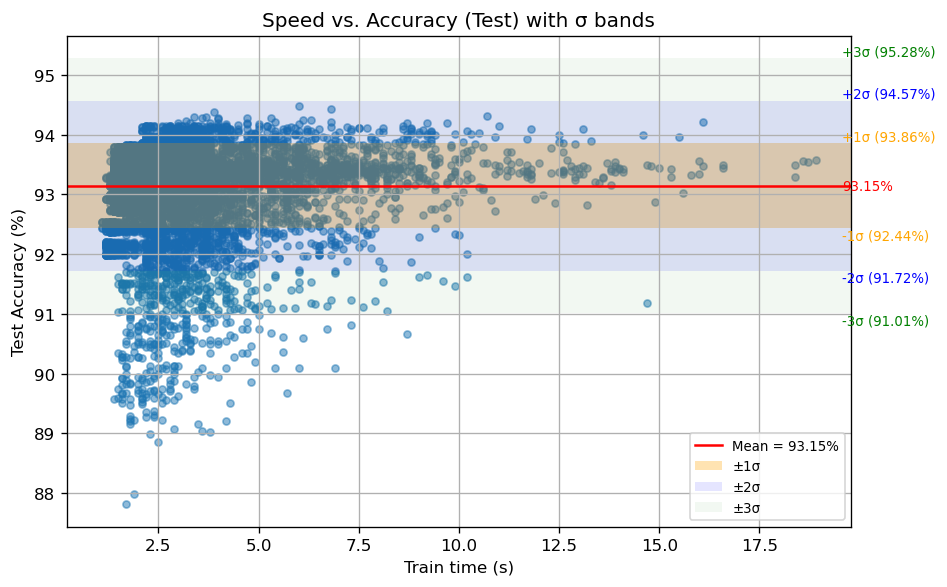

In [76]:
# speed vs test accuracy with shaded ±σ bands
sub = df.dropna(subset=["test_acc_pct"]).copy()

fig, ax = plt.subplots()
ax.scatter(sub["train_time_s"], sub["test_acc_pct"], alpha=0.5, s=18)
ax.set_xlabel("Train time (s)")
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("Speed vs. Accuracy (Test) with σ bands")

# Compute stats
mean_acc = sub["test_acc_pct"].mean()
std_acc  = sub["test_acc_pct"].std()
print(f'σ = {std_acc:.4f}')

x_range = [sub["train_time_s"].min(), sub["train_time_s"].max()]
x_text  = x_range[1] * 1.035

# Mean line
ax.axhline(mean_acc, color="red", linestyle="-", lw=1.5, label=f"Mean = {mean_acc:.2f}%")

# Horizontal spans across the entire axes (independent of x limits)
ax.axhspan(mean_acc - std_acc,   mean_acc + std_acc,
           facecolor="orange", alpha=0.30, label="±1σ")
ax.axhspan(mean_acc - 2*std_acc, mean_acc + 2*std_acc,
           facecolor="blue",   alpha=0.1, label="±2σ")
ax.axhspan(mean_acc - 3*std_acc, mean_acc + 3*std_acc,
           facecolor="green",  alpha=0.05, label="±3σ")


# Annotate mean and bands
ax.text(x_text, mean_acc, f"{mean_acc:.2f}%", va="center", ha="left", color="red", fontsize=8)
ax.text(x_text, mean_acc + std_acc, f"+1σ ({mean_acc+std_acc:.2f}%)", va="bottom", ha="left",
        color="orange", fontsize=8)
ax.text(x_text, mean_acc - std_acc, f"-1σ ({mean_acc-std_acc:.2f}%)", va="top", ha="left",
        color="orange", fontsize=8)
ax.text(x_text, mean_acc + 2*std_acc, f"+2σ ({mean_acc+2*std_acc:.2f}%)", va="bottom", ha="left",
        color="blue", fontsize=8)
ax.text(x_text, mean_acc - 2*std_acc, f"-2σ ({mean_acc-2*std_acc:.2f}%)", va="top", ha="left",
        color="blue", fontsize=8)
ax.text(x_text, mean_acc + 3*std_acc, f"+3σ ({mean_acc+3*std_acc:.2f}%)", va="bottom", ha="left",
        color="green", fontsize=8)
ax.text(x_text, mean_acc - 3*std_acc, f"-3σ ({mean_acc-3*std_acc:.2f}%)", va="top", ha="left",
        color="green", fontsize=8)

ax.legend(loc="best", fontsize=8)
plt.tight_layout()
plt.savefig(OUTDIR/"speed_vs_testacc_sigma.png")
plt.show()


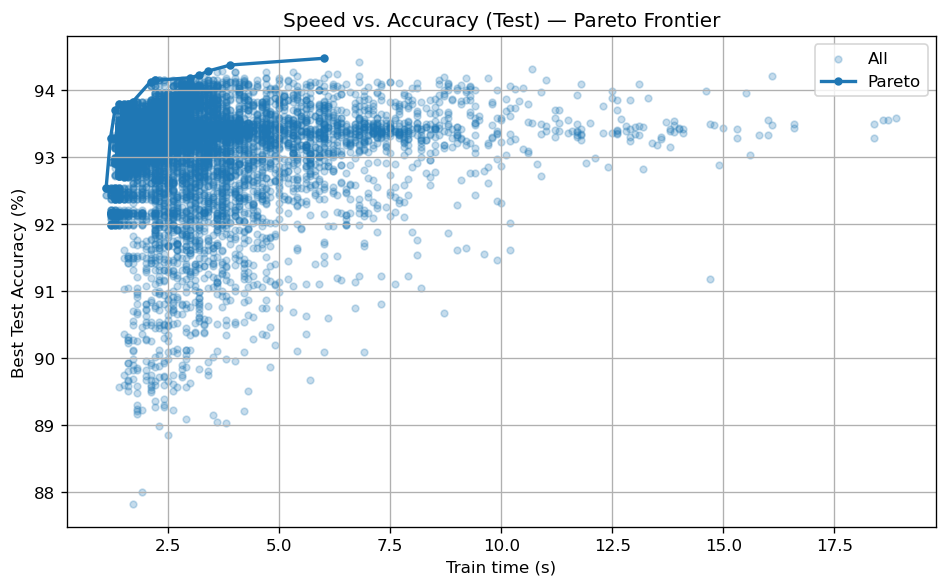

[pareto frontier]


,train_time_s,test_acc_pct,model_key
7933,1.1,92.54,m7934_L1_U32_B512_lr0.14_m0.945_d0.98_s3_T13
9197,1.2,93.29,m9198_L1_U32_B512_lr0.14_m0.96_d0.975_s3_T15
7803,1.3,93.71,m7804_L1_U32_B256_lr0.14_m0.94_d0.98_s3_T13
6577,1.4,93.80,m6578_L1_U32_B256_lr0.145_m0.94_d0.975_s3_T11
3900,1.7,93.83,m3901_L1_U32_B128_lr0.135_m0.94_d0.965_s3_T7
3982,2.1,94.13,m3983_L1_U32_B128_lr0.15_m0.945_d0.975_s3_T7
6508,2.2,94.15,m6509_L1_U32_B256_lr0.13_m0.945_d0.98_s3_T11
7647,3.0,94.19,m7648_L1_U32_B128_lr0.13_m0.96_d0.975_s3_T13
3273,3.2,94.23,m3274_L1_U32_B128_lr0.13_m0.96_d0.98_s3_T6
8898,3.4,94.29,m8899_L1_U32_B128_lr0.13_m0.96_d0.98_s3_T15


In [77]:
clean = df[["train_time_s","test_acc_pct","model_key"]].dropna().copy()
clean = clean.sort_values(["train_time_s","test_acc_pct"], ascending=[True,False])

pareto = []
best_acc = -np.inf
for _, r in clean.iterrows():
    acc = r["test_acc_pct"]
    if acc > best_acc:
        pareto.append(r)
        best_acc = acc
pareto = pd.DataFrame(pareto)

fig, ax = plt.subplots()
ax.scatter(clean["train_time_s"], clean["test_acc_pct"], alpha=0.25, s=16, label="All")
if len(pareto):
    ax.plot(pareto["train_time_s"], pareto["test_acc_pct"], "-o", lw=2, ms=4, label="Pareto")
ax.set_xlabel("Train time (s)")
ax.set_ylabel("Best Test Accuracy (%)")
ax.set_title("Speed vs. Accuracy (Test) — Pareto Frontier")
ax.legend(loc="best")
plt.tight_layout()
plt.savefig(OUTDIR/"speed_vs_accuracy_test_pareto.png")
plt.show()

print("[pareto frontier]")
display(pareto.head(20))

# Scaling plots: threads, batch

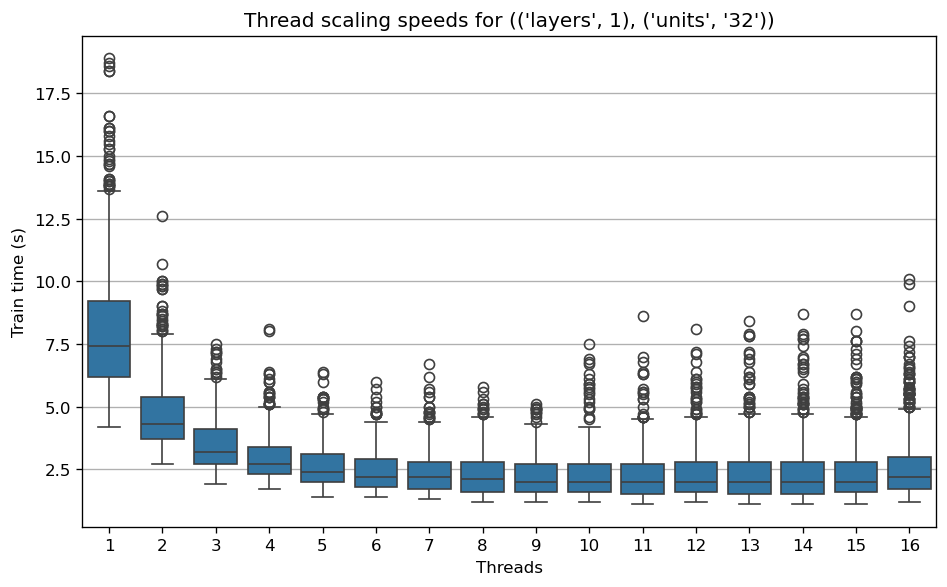

In [78]:
# pick something you trained widely
arch = ("layers", 1), ("units", "32")

mask = np.ones(len(df), dtype=bool)
for k, v in arch:
    if k in df.columns:
        mask &= (df[k].astype(str) == str(v))

sub = df[mask].dropna(subset=["threads"]).copy()
sub = sub.sort_values("threads")
if len(sub):
    fig, ax = plt.subplots()
    sns.boxplot(
        x='threads',
        y='train_time_s',
        data=sub,
        showfliers=True
    )
    ax.set_xlabel("Threads")
    ax.set_ylabel("Train time (s)")
    ax.set_title(f"Thread scaling speeds for {arch}")
    plt.tight_layout()
    plt.savefig(OUTDIR/"scaling_threads_speed.png"); plt.show()
else:
    print("[warn] no rows matched the selected arch for thread scaling.")

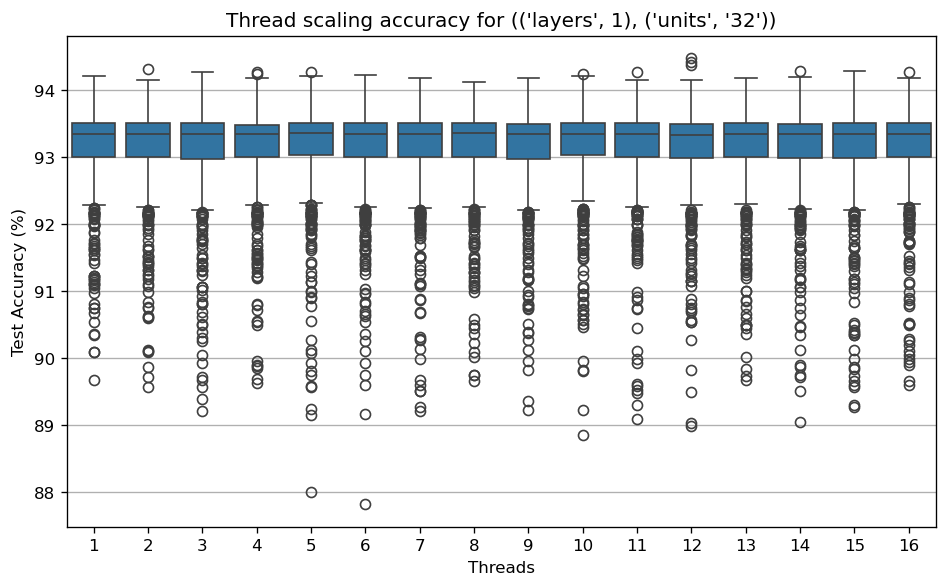

In [79]:
if len(sub):
    fig, ax = plt.subplots()
    sns.boxplot(
        x='threads',
        y='test_acc_pct',
        data=sub,
        showfliers=True
    )
    ax.set_xlabel("Threads")
    ax.set_ylabel("Test Accuracy (%)")
    ax.set_title(f"Thread scaling accuracy for {arch}")
    plt.tight_layout()
    plt.savefig(OUTDIR/"scaling_threads_acc.png"); plt.show()
else:
    print("[warn] no rows matched the selected arch for thread scaling.")

In [80]:
rows = ['train_time_s', 'test_acc_pct']
desc = df.groupby('threads')[rows].describe().round(2)
desc

train_time_s                                       test_acc_pct  \
               count  mean   std  min  25%  50%  75%   max        count   
threads                                                                   
1              625.0  8.16  2.64  4.2  6.2  7.4  9.2  18.9        625.0   
2              625.0  4.77  1.51  2.7  3.7  4.3  5.4  12.6        625.0   
3              625.0  3.51  1.04  1.9  2.7  3.2  4.1   7.5        625.0   
4              625.0  2.96  0.94  1.7  2.3  2.7  3.4   8.1        625.0   
5              625.0  2.66  0.85  1.4  2.0  2.4  3.1   6.4        625.0   
6              625.0  2.43  0.77  1.4  1.8  2.2  2.9   6.0        625.0   
7              625.0  2.36  0.80  1.3  1.7  2.2  2.8   6.7        625.0   
8              625.0  2.30  0.80  1.2  1.6  2.1  2.8   5.8        625.0   
9              625.0  2.25  0.76  1.2  1.6  2.0  2.7   5.1        625.0   
10             625.0  2.29  0.92  1.2  1.6  2.0  2.7   7.5        625.0   
11             625.0  2.26  0.96  1.1  1.5  2.0  2.7   8.6        625.0   
12             625.0  2.33  1.04  1.2  1.6  2.0  2.8   8.1        625.0   
13             625.0  2.34  1.15  1.1  1.5  2.0  2.8   8.4        625.0   
14             625.0  2.37  1.19  1.1  1.5  2.0  2.8   8.7        625.0   
15             625.0  2.40  1.20  1.1  1.6  2.0  2.8   8.7        625.0   
16             625.0  2.62  1.37  1.2  1.7  2.2  3.0  10.1        625.0   

                                                         
          mean   std    min    25%    50%    75%    max  
threads                                                  
1        93.16  0.67  89.67  93.01  93.35  93.51  94.22  
2        93.16  0.68  89.56  93.01  93.35  93.51  94.32  
3        93.13  0.75  89.20  92.98  93.35  93.51  94.28  
4        93.15  0.68  89.62  93.00  93.35  93.49  94.28  
5        93.16  0.74  87.99  93.03  93.36  93.52  94.28  
6        93.13  0.73  87.81  93.00  93.35  93.51  94.23  
7        93.15  0.73  89.21  93.00  93.35  93.51  94.18  
8        93.15  0.68  89.66  93.00  93.36  93.51  94.13  
9        93.13  0.70  89.22  92.98  93.35  93.50  94.19  
10       93.15  0.71  88.85  93.03  93.35  93.51  94.24  
11       93.15  0.71  89.08  93.01  93.35  93.51  94.28  
12       93.15  0.71  88.98  92.99  93.34  93.50  94.48  
13       93.16  0.69  89.67  93.00  93.35  93.51  94.19  
14       93.15  0.70  89.04  92.99  93.35  93.50  94.29  
15       93.12  0.77  89.27  92.99  93.35  93.51  94.29  
16       93.14  0.72  89.59  93.01  93.35  93.51  94.27

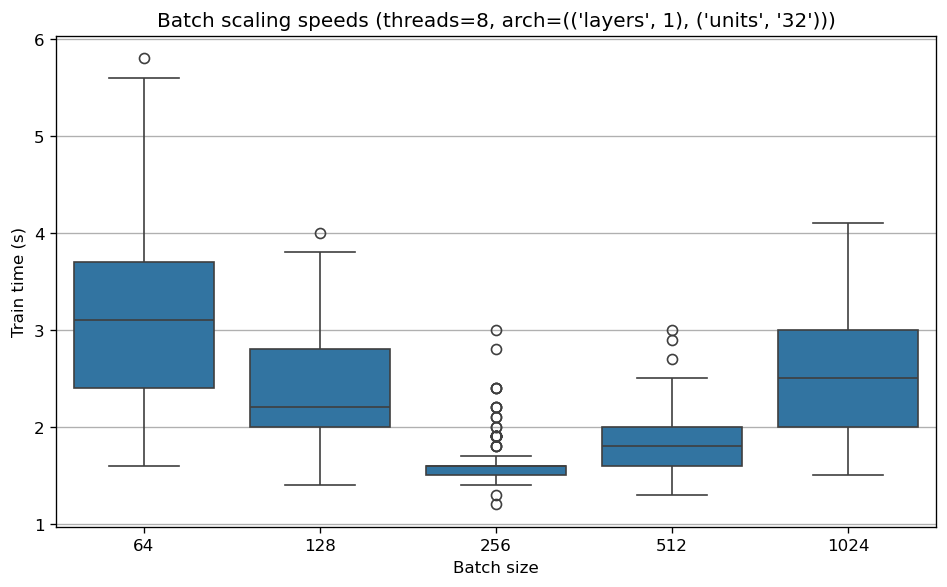

In [81]:
pick_threads = 8
mask = (df.get("threads", np.nan) == pick_threads)
for k, v in arch:
    if k in df.columns:
        mask &= (df[k].astype(str) == str(v))

sub = df[mask].dropna(subset=["batch"]).copy().sort_values("batch")
if len(sub):
    fig, ax = plt.subplots()
    sns.boxplot(
        x='batch',
        y='train_time_s',
        data=sub,
        showfliers=True
    )    
    ax.set_xlabel("Batch size")
    ax.set_ylabel("Train time (s)")
    ax.set_title(f"Batch scaling speeds (threads={pick_threads}, arch={arch})")
    plt.tight_layout()
    plt.savefig(OUTDIR/"scaling_batch_speed.png"); plt.show()
else:
    print("[warn] no rows matched for batch scaling plot.")

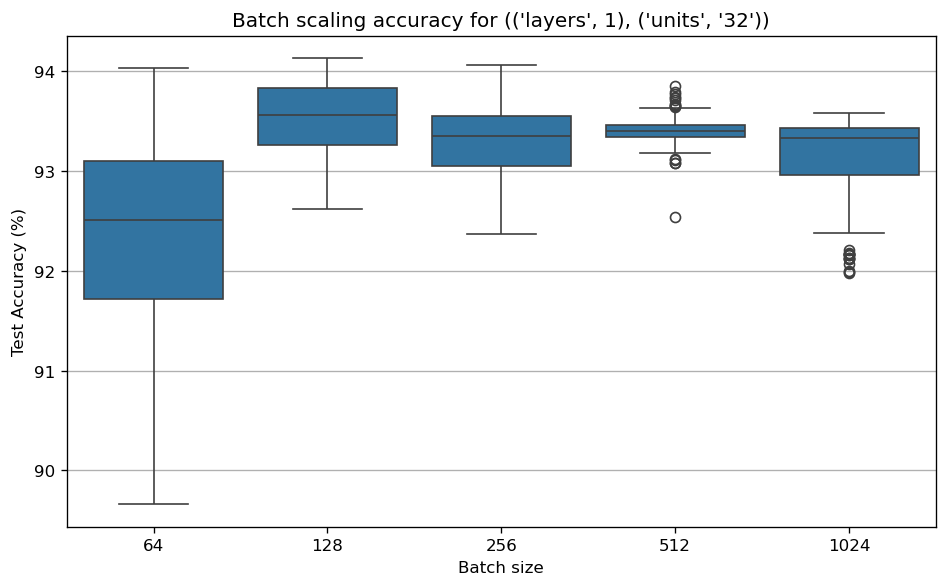

In [82]:
if len(sub):
    fig, ax = plt.subplots()
    sns.boxplot(
        x='batch',
        y='test_acc_pct',
        data=sub,
        showfliers=True
    )
    ax.set_xlabel("Batch size")
    ax.set_ylabel("Test Accuracy (%)")
    ax.set_title(f"Batch scaling accuracy for {arch}")
    plt.tight_layout()
    plt.savefig(OUTDIR/"scaling_threads_acc.png"); plt.show()
else:
    print("[warn] no rows matched the selected arch for thread scaling.")

In [83]:
rows = ['train_time_s', 'test_acc_pct']
desc = df.groupby('batch')[rows].describe().round(2)
desc

train_time_s                                       test_acc_pct         \
             count  mean   std  min  25%  50%  75%   max        count   mean   
batch                                                                          
64          2000.0  3.97  1.87  1.4  2.7  3.5  4.7  16.6       2000.0  92.35   
128         2000.0  3.00  1.45  1.4  2.2  2.6  3.2  12.5       2000.0  93.55   
256         2000.0  2.18  1.24  1.1  1.5  1.7  2.2  10.9       2000.0  93.31   
512         2000.0  2.48  1.62  1.1  1.6  1.9  2.6  12.9       2000.0  93.40   
1024        2000.0  3.37  2.53  1.2  2.0  2.6  3.6  18.9       2000.0  93.12   

                                                
        std    min    25%    50%    75%    max  
batch                                           
64     1.06  87.81  91.75  92.57  93.10  94.48  
128    0.38  92.38  93.24  93.58  93.85  94.38  
256    0.33  92.37  93.05  93.34  93.56  94.15  
512    0.17  92.54  93.34  93.40  93.46  93.92  
1024   0.46  91.98  92.96  93.33  93.43  93.59

# Simple effect sizes

In [84]:
baseline_mask = (
    (df["layers"]==1) &
    (df["units"].astype(str)=="32") &
    (df["batch"]==256) &
    (df["threads"]==8) &
    (df["momentum"]==0.95) &
    (df["decay"]==0.98)
)
base = df[baseline_mask]
if len(base):
    base_time = base["train_time_s"].median()
    base_acc  = base["test_acc_pct"].median()
    print(f"[baseline] time={base_time:.2f}s acc={base_acc:.2f}% (n={len(base)})")

    def compare(col):
        tmp = df[baseline_mask | (df[col].notna())]
        summ = (tmp.groupby(col)
                  .agg(time_med=("train_time_s","median"),
                       acc_med=("test_acc_pct","median"),
                       n=("model_key","count"))
                  .reset_index()
                  .sort_values("acc_med", ascending=False))
        return summ

    if "lr" in df:    display(compare("lr"))
    if "momentum" in df: display(compare("momentum"))
    if "decay" in df: display(compare("decay"))
else:
    print("[info] baseline mask matched no rows; tweak the mask above.")

[baseline] time=1.50s acc=93.17% (n=5)


,lr,time_med,acc_med,n
1,0.135,2.4,93.39,2000
2,0.140,2.5,93.36,2000
4,0.150,2.5,93.35,2000
3,0.145,2.3,93.33,2000
0,0.130,2.4,93.31,2000


,momentum,time_med,acc_med,n
0,0.940,2.40,93.43,2000
1,0.945,2.50,93.37,2000
2,0.950,2.40,93.34,2000
3,0.955,2.40,93.30,2000
4,0.960,2.35,93.26,2000


,decay,time_med,acc_med,n
0,0.965,2.4,93.37,2000
2,0.975,2.4,93.36,2000
1,0.970,2.4,93.35,2000
3,0.980,2.5,93.33,2000
4,0.985,2.3,93.33,2000


# Interactive Plots

In [90]:

import plotly.express as px
import plotly.io as pio
from IPython.display import display
from ipywidgets import Dropdown, Checkbox, BoundedIntText, HBox, VBox, Output, Layout

# good defaults for classic Jupyter / JupyterLab / VS Code
pio.renderers.default = "notebook_connected"
# try "vscode" in VS Code, or "jupyterlab" in JupyterLab

# -----------------------------
# Color palettes & small utils
# -----------------------------
OKABE_ITO = [
    "#000000",  # black
    "#E69F00",  # orange
    "#56B4E9",  # sky blue
    "#009E73",  # bluish green
    "#F0E442",  # yellow
    "#0072B2",  # blue
    "#D55E00",  # vermillion
    "#CC79A7",  # reddish purple
]

def _numeric_like(series: pd.Series) -> bool:
    if pd.api.types.is_numeric_dtype(series):
        return True
    try:
        pd.to_numeric(series)
        return True
    except Exception:
        return False

def _auto_discrete_labels(series: pd.Series, max_bins: int = 8, strategy: str = "quantile") -> pd.Series:
    """
    Return a categorical Series of <= max_bins string labels.
    - If #unique <= max_bins: use those values directly (categorical).
    - Else if numeric: bin into <= max_bins buckets (quantile/uniform) with nice labels.
    - Else: keep top max_bins-1 categories, group rest as "other".
    """
    s = series.dropna()
    if s.empty:
        return series.astype("string")

    is_num = pd.api.types.is_numeric_dtype(s)
    nunique = s.nunique(dropna=True)

    # A) already low-cardinality
    if nunique <= max_bins:
        return series.astype("string")

    # B) numeric -> bin
    if is_num:
        s_num = pd.to_numeric(series, errors="coerce")
        if strategy == "uniform":
            cats = pd.cut(s_num, bins=max_bins, include_lowest=True)
        else:
            cats = pd.qcut(s_num, q=max_bins, duplicates="drop")

        # Build prettier interval labels
        # (cats is categorical with Interval categories)
        intervals = list(cats.cat.categories)
        labels = []
        for i, iv in enumerate(intervals):
            lo, hi = iv.left, iv.right
            labels.append(f"[{lo:.4g}, {hi:.4g})" if i < len(intervals)-1 else f"[{lo:.4g}, {hi:.4g}]")

        out = pd.Series(cats, index=series.index).astype(str)
        # Replace default interval repr with our compact labels (1:1 in order)
        mapping = {str(intervals[i]): labels[i] for i in range(len(intervals))}
        out = out.map(lambda v: mapping.get(v, v))
        return out

    # C) non-numeric, high-cardinality -> top-K and "other"
    counts = s.astype("string").value_counts()
    keep = set(counts.index[: max_bins - 1])
    out = series.astype("string").map(lambda v: v if v in keep else "other")
    return out

# -----------------------------
# Data check and base subset
# -----------------------------
needed = {"train_time_s", "test_acc_pct"}
missing = needed - set(df.columns)
if missing:
    raise ValueError(f"DataFrame missing required columns: {missing}")

sub = df.dropna(subset=["train_time_s", "test_acc_pct"]).copy()

# Candidate color columns present in your DF
color_candidates = [c for c in ["lr","momentum","decay","step","layers","units","batch","threads"]
                    if c in sub.columns]
if not color_candidates:
    raise ValueError("No candidate hyperparameter columns found.")

# -----------------------------
# Widgets
# -----------------------------
color_by       = Dropdown(options=color_candidates, value=color_candidates[0], description="Color by:")
color_mode     = Dropdown(options=["auto","continuous","discrete"], value="auto", description="Mode:")
bin_strategy   = Dropdown(options=["quantile","uniform"], value="quantile", description="Bins by:")
bins_widget    = BoundedIntText(value=8, min=2, max=30, step=1, description="#bins:")
logx           = Checkbox(value=False, description="log x")
logy           = Checkbox(value=False, description="log y")
out            = Output()

# For layout control (show/hide bin controls)
def _show(widget, vis: bool):
    widget.layout.display = ("flex" if vis else "none")

def _bin_controls_visible(col: str, mode: str, max_bins: int) -> bool:
    """
    Bin controls are useful only when:
    - mode == 'discrete'
    - and column is numeric-like
    - and #unique values > max_bins
    """
    s = sub[col].dropna()
    if s.empty:
        return False
    if mode != "discrete":
        return False
    if not _numeric_like(s):
        return False
    return s.nunique(dropna=True) > max_bins

def interactive_speed_vs_acc(
    df: pd.DataFrame,
    color_by: str,
    color_mode: str,
    bins: int,
    bin_strategy: str,
    title: str = "Speed vs Test Accuracy — colored",
):
    data = df.dropna(subset=["train_time_s", "test_acc_pct"]).copy()
    if color_by not in data.columns:
        raise ValueError(f"{color_by!r} not in dataframe columns")

    is_num = _numeric_like(data[color_by])
    mode = color_mode.lower()
    if mode not in {"auto", "continuous", "discrete"}:
        raise ValueError("color_mode must be 'auto', 'continuous', or 'discrete'")
    if mode == "auto":
        mode = "continuous" if is_num else "discrete"

    color_kwargs = {}
    color_title = color_by

    if mode == "continuous" and is_num:
        data[color_by] = pd.to_numeric(data[color_by], errors="coerce")
        color_kwargs.update(dict(color=data[color_by], color_continuous_scale="Cividis"))
    else:
        # Discrete: either low-cardinality unique values OR binned numeric
        cats = _auto_discrete_labels(data[color_by], max_bins=bins, strategy=bin_strategy)
        data[color_by] = cats
        data = data.dropna(subset=[color_by])
        color_title = color_by if cats.nunique(dropna=True) <= bins else f"{color_by} (binned)"
        # Limit palette length to #categories (min 2 so Plotly is happy)
        k = max(2, min(len(OKABE_ITO), data[color_by].nunique()))
        color_kwargs.update(dict(color=data[color_by], color_discrete_sequence=OKABE_ITO[:k]))

    fig = px.scatter(
        data,
        x="train_time_s",
        y="test_acc_pct",
        title=f"Speed vs Test Accuracy — colored by {color_by}",
        hover_data=[c for c in ["model_key","layers","units","batch","threads","lr","momentum","decay","step"]
                    if c in data.columns],
        labels={"train_time_s": "Train time (s)", "test_acc_pct": "Test Accuracy (%)", color_by: color_title},
        **color_kwargs,
    )

    fig.update_traces(marker=dict(size=8, opacity=0.85, line=dict(width=0.6, color="white")))
    fig.update_layout(
        legend_title=color_title,
        margin=dict(l=60, r=20, t=50, b=50),
        template="plotly_white",
    )
    fig.update_xaxes(type="log" if logx.value else "linear", showgrid=True)
    fig.update_yaxes(type="log" if logy.value else "linear", showgrid=True, ticksuffix="%")
    return fig

def _toggle_bin_controls():
    # Decide visibility based on current selection
    vis = _bin_controls_visible(color_by.value, color_mode.value, bins_widget.value)
    _show(bin_strategy, vis)
    _show(bins_widget, vis)

def render(_=None):
    _toggle_bin_controls()
    with out:
        out.clear_output(wait=True)
        fig = interactive_speed_vs_acc(
            sub,
            color_by=color_by.value,
            color_mode=color_mode.value,
            bins=bins_widget.value,
            bin_strategy=bin_strategy.value,
        )
        display(fig)

# Wire observers (any change re-renders and re-evaluates visibility)
for w in (color_by, color_mode, bins_widget, bin_strategy, logx, logy):
    w.observe(render, names="value")

# UI
controls_row1 = HBox([color_by, color_mode], layout=Layout(align_items="center", gap="12px"))
controls_row2 = HBox([bin_strategy, bins_widget], layout=Layout(align_items="center", gap="12px"))
controls_row3 = HBox([logx, logy], layout=Layout(align_items="center", gap="12px"))

display(VBox([controls_row1, controls_row2, controls_row3]))
display(out)

# initial draw
render()


Output()

# Grid Summary Reporting (outputs `grid_data.md`)

In [87]:

import os, json, math, textwrap, datetime as dt
from pathlib import Path
import pandas as pd
import numpy as np

def _find_results_csv():
    glb = globals()
    if "DATA_PATH" in glb:
        p = Path(glb["DATA_PATH"])
        if p.exists() and p.name == "results.csv":
            return p

    here = Path.cwd()
    if (here / "results.csv").exists():
        return here / "results.csv"

    candidates = sorted((here / "runs").glob("**/results.csv"), key=lambda p: p.stat().st_mtime, reverse=True)
    if candidates:
        return candidates[0]

    raise FileNotFoundError("Could not find results.csv. Set DATA_PATH or run in a run folder with results.csv present.")

def _fmt_pct(x, nd=2):
    return "NA" if pd.isna(x) else f"{x:.{nd}f}%"

def _fmt_f(x, nd=3):
    return "NA" if pd.isna(x) else f"{x:.{nd}f}"

def _pareto_front(rows, tkey="train_time_s", akey="test_acc_pct"):
    df = rows.dropna(subset=[tkey, akey]).copy()
    df = df.sort_values([tkey, akey], ascending=[True, False])
    frontier = []
    best_acc = -np.inf
    for _, r in df.iterrows():
        if r[akey] > best_acc:
            frontier.append(r)
            best_acc = r[akey]
    return pd.DataFrame(frontier)

# --- Load data
RESULTS_CSV = _find_results_csv()
RUN_DIR = RESULTS_CSV.parent
PLOTS_DIR = RUN_DIR / "plots"
OUT_MD = RUN_DIR / "grid_data.md"

df = pd.read_csv(RESULTS_CSV)

# Be tolerant: ensure expected columns exist
needed_cols = {"train_time_s", "test_acc_pct"}
missing = needed_cols - set(df.columns)
if missing:
    raise ValueError(f"results.csv missing columns: {missing}")

# Clean
rows = df.copy()
rows["train_time_s"] = pd.to_numeric(rows["train_time_s"], errors="coerce")
rows["test_acc_pct"] = pd.to_numeric(rows["test_acc_pct"], errors="coerce")

clean = rows.dropna(subset=["train_time_s", "test_acc_pct"]).copy()
n_total = len(rows)
n_clean = len(clean)

# --- Global stats
def _stats(series):
    s = pd.Series(series).dropna()
    return dict(
        n=len(s),
        mean=float(s.mean()) if len(s) else np.nan,
        std=float(s.std(ddof=1)) if len(s) > 1 else np.nan,
        p10=float(s.quantile(0.10)) if len(s) else np.nan,
        p50=float(s.quantile(0.50)) if len(s) else np.nan,
        p90=float(s.quantile(0.90)) if len(s) else np.nan,
        min=float(s.min()) if len(s) else np.nan,
        max=float(s.max()) if len(s) else np.nan,
    )

time_stats = _stats(clean["train_time_s"])
acc_stats  = _stats(clean["test_acc_pct"])

# --- Best models
best_acc_row = clean.sort_values("test_acc_pct", ascending=False).head(1)
fastest_row  = clean.sort_values("train_time_s").head(1)

# --- Pareto frontier (fast & accurate)
pareto = _pareto_front(clean, "train_time_s", "test_acc_pct")

# --- Hyperparameter coverage
def uniq(col):
    return sorted(set(clean[col].dropna())) if col in clean.columns else []

hp_sections = []
for name in ["threads","batch","lr","momentum","decay","step","layers","units"]:
    if name in clean.columns:
        vals = uniq(name)
        if not vals: 
            continue
        if len(vals) > 24:
            hp_sections.append(f"- **{name}**: {len(vals)} unique values (range: {min(vals)} … {max(vals)})")
        else:
            hp_sections.append(f"- **{name}**: {', '.join(str(v) for v in vals)}")

# --- Top tables
def top_table(df, by, ascending, k=10):
    cols = [c for c in ["model_key","threads","batch","lr","momentum","decay","step","layers","units","train_time_s","test_acc_pct"] if c in df.columns]
    t = df.sort_values(by, ascending=ascending)[cols].head(k).copy()
    # format a couple columns
    if "train_time_s" in t.columns:
        t["train_time_s"] = t["train_time_s"].map(lambda v: f"{v:.3f}")
    if "test_acc_pct" in t.columns:
        t["test_acc_pct"] = t["test_acc_pct"].map(lambda v: f"{v:.2f}%")
    return t

top_fast   = top_table(clean, by="train_time_s", ascending=True, k=10)
top_acc    = top_table(clean, by="test_acc_pct", ascending=False, k=10)
top_pareto = top_table(pareto, by=["train_time_s","test_acc_pct"], ascending=[True, False], k=min(20, len(pareto)))

# --- Link to plots if present
plot_links = []
plot_candidates = [
    "speed_vs_accuracy_all.png",
    "speed_vs_accuracy_pareto.png",
    "speed_vs_testacc_sigma.png",
    "speed_vs_trainingacc_sigma.png",
    "speed_vs_accuracy_colored.png",
]
for fn in plot_candidates:
    p = PLOTS_DIR / fn
    if p.exists():
        plot_links.append(f"- ![plot]({p.relative_to(RUN_DIR)})")

# --- Markdown render helpers
def df_to_md_table(d):
    if d.empty: 
        return "_(no rows)_"
    return d.to_markdown(index=False)

now = dt.datetime.now().strftime("%Y-%m-%d %H:%M")

# --- Build Markdown
md = []
md.append(f"# Grid Run Summary  \n*Generated:* {now}\n")
md.append(f"- **Run folder:** `{RUN_DIR}`")
md.append(f"- **Results file:** `{RESULTS_CSV.name}`")
md.append(f"- **Rows:** {n_total} (usable: {n_clean})\n")

md.append("## Coverage\n" + ("\n".join(hp_sections) if hp_sections else "_(no hyperparameter columns found)_"))

md.append("## Speed (train_time_s)")
md.append(
    textwrap.dedent(f"""
    - mean = **{_fmt_f(time_stats['mean'])} s**, σ = {_fmt_f(time_stats['std'])} s  
    - p10 = {_fmt_f(time_stats['p10'])} s, median = {_fmt_f(time_stats['p50'])} s, p90 = {_fmt_f(time_stats['p90'])} s  
    - min = **{_fmt_f(time_stats['min'])} s**, max = **{_fmt_f(time_stats['max'])} s**
    """).strip()
)

md.append("## Accuracy (test_acc_pct)")
md.append(
    textwrap.dedent(f"""
    - mean = **{_fmt_pct(acc_stats['mean'])}**, σ = {_fmt_pct(acc_stats['std'])}  
    - p10 = {_fmt_pct(acc_stats['p10'])}, median = {_fmt_pct(acc_stats['p50'])}, p90 = {_fmt_pct(acc_stats['p90'])}  
    - min = **{_fmt_pct(acc_stats['min'])}**, max = **{_fmt_pct(acc_stats['max'])}**
    """).strip()
)

if not best_acc_row.empty:
    r = best_acc_row.iloc[0]
    md.append("### Best by accuracy")
    md.append(
        f"- **{_fmt_pct(r['test_acc_pct'])}** in **{_fmt_f(r['train_time_s'])} s**  "
        + ("— model_key: `{}`".format(r['model_key']) if "model_key" in r else "")
    )

if not fastest_row.empty:
    r = fastest_row.iloc[0]
    md.append("### Fastest model")
    md.append(
        f"- **{_fmt_f(r['train_time_s'])} s** with accuracy **{_fmt_pct(r['test_acc_pct'])}**  "
        + ("— model_key: `{}`".format(r['model_key']) if "model_key" in r else "")
    )

md.append("## Pareto frontier (fast & accurate)")
md.append(df_to_md_table(top_pareto))

md.append("## Top-10 fastest")
md.append(df_to_md_table(top_fast))

md.append("## Top-10 most accurate")
md.append(df_to_md_table(top_acc))

if plot_links:
    md.append("## Plots")
    md.extend(plot_links)

# --- Write file
OUT_MD.write_text("\n\n".join(md), encoding="utf-8")
print(f"[report] wrote {OUT_MD}")


[report] wrote /home/h6x/Programming/C/perceptron-c/runs/grid_threads/grid_data.md
